In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyapt_tools.apt_tools import apt_importers

%matplotlib inline

In [2]:
d = apt_importers.read_epos('../../../example-data/voldata.epos')

In [3]:
# isolate multiples
m = d[d.ipp != 1].copy()

In [4]:
# assign id number to multiples
m.loc[:,'id'] = m.ipp.cumsum()

In [5]:
# label each hit multiple
def hitlabel(d):
    d.loc[:,'hn'] = range(len(d))
    return d

mg = m.groupby('id')

m = mg.apply(hitlabel)

Text(0, 0.5, 'Second Hit (Da)')

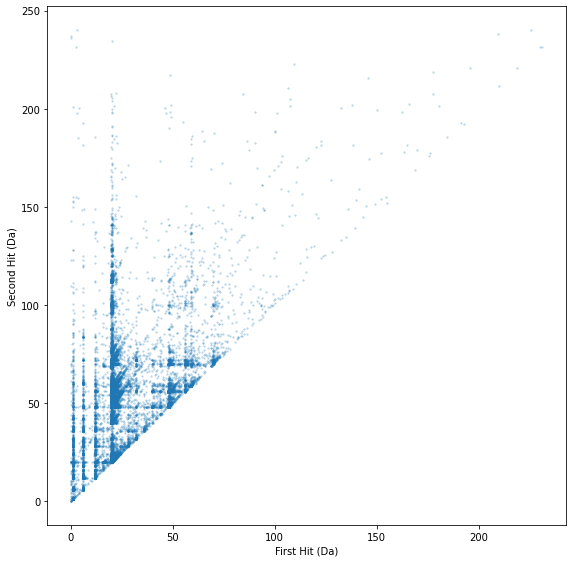

In [6]:
# plot single masses vs second masses
fig = plt.figure(figsize=[9,9])
ax = fig.add_axes([.1,.1,.8,.8])

ax.scatter(m.loc[m.hn==0,'m/n (Da)'],m.loc[m.hn==1,'m/n (Da)'], alpha=0.3, s=5, lw=0)
ax.set_xlabel('First Hit (Da)')
ax.set_ylabel('Second Hit (Da)')
# ax.set_xlim(0,150)
# ax.set_ylim(0,150)

C:\Users\APTUser\AppData\Local\Temp\ipykernel_46764\3379374459.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  cmap.set_bad('w')
C:\Users\APTUser\AppData\Local\Temp\ipykernel_46764\3379374459.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  cmap.set_under('w')
C:\Users\APTUser\AppData\Local\Temp\ipykernel_46764\3379374459.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.

Text(0, 0.5, 'Second Hit (Da)')

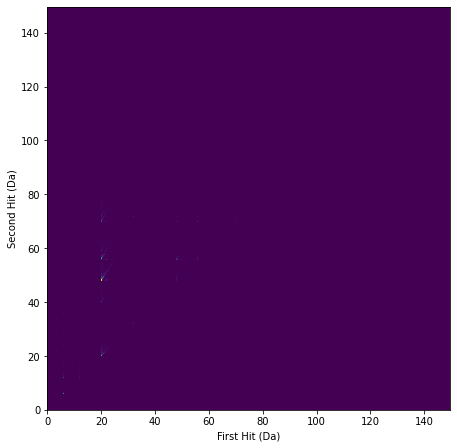

In [7]:
fig = plt.figure(figsize=[7,7])
ax = fig.add_axes([.1,.1,.8,.8])

cmap = plt.cm.jet
cmap.set_bad('w')
cmap.set_under('w')
cmap.set_over('r')

h2d = ax.hist2d(m.loc[m.hn==0,'m/n (Da)'],m.loc[m.hn==1,'m/n (Da)'],bins=np.arange(0,150,0.3), vmin=0.0000001, vmax=500)

ax.set_xlabel('First Hit (Da)')
ax.set_ylabel('Second Hit (Da)')
# ax.set_xlim(0,150)
# ax.set_ylim(0,150)

# fig.savefig('hit_hist.pdf')